In [1]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import numpy as np
import pandas as pd
import math

import thinkstats2
import thinkplot

#import nsfg
#import first
#import brfss
#import scatter

In [24]:
def RMSE(estimates,actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):

    def Vertline(x, y=1):
        thinkplot.Plot([x,x],[0,y], color='0.8', linewidth=3)

    means=[]
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    
    cdf=thinkstats2.Cdf(means)
    ci=cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, mu)

    print(f'standard error: {stderr:.3f}')
    print(f'confidence interval: {ci[0]:.3f}, {ci[1]:.3f}')
    Vertline(ci[0])
    Vertline(ci[1])
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='sample mean', ylabel='CDF',
                     title='Sampling distribution')

standard error: 2.385
confidence interval: 85.953, 93.882


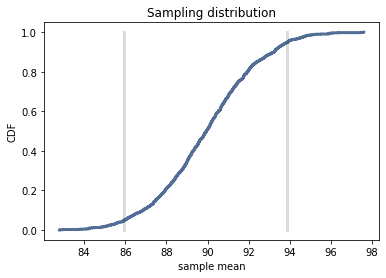

In [25]:
SimulateSample()